# Graph Analysis Example

### About the project

The main goal of this project is to have a first contact with graph analysis.

The intent is to analyze some nodes and edges and calculate a metric called "Centrality Proximity" for each node.

For this project consideration:
- The distance between two nodes is its shortest path;
- The "Distancing" of each node is the sum of all distances from other nodes to it;
- The node "Proximity" is the inverse of its "Distancing";

### What was used

The analysis was done in Python3 using a jupyter environment.

The data is in the "edges" file.

Python packages used:
- [itertools](https://docs.python.org/3/library/itertools.html): quick way to get combinations, I only used because this is not the learning goal for this project;
- [pandas](https://pandas.pydata.org/): data sorting and presentation;
- [matplotlib](https://matplotlib.org/) and [networkx](https://networkx.github.io/): plotting a graph of the data, this was an extra;

### Final Thoughts

The “Proximity” metric maybe was not the best, because it penalizes the vertex that has more edges for example. Weighting the sum of the distances by the number of edges would possibly help in this regard.

In [280]:
# IMPORTS
import itertools
import pandas as pd

In [291]:
# FUNCTIONS

def shortest_path(orig, dest, data, path=[]):
    " this function finds the shortest path between two nodes, if it can't find a path it will return None"
    # updating path for this iter
    path = path + [orig]
    # checking dead start
    if orig not in data.keys():
        return None
    # checking if destiny found
    if dest in data[orig]:
        return path + [dest]
    # iterating over nodes
    shortest = None
    for no in data[orig]:
        new = shortest_path(no, dest, data, path=path)
        if new:
            if shortest:
                if len(new) < len(shortest):
                    shortest = new
            else:
                shortest = new
    return shortest


In [292]:
# READING DATA
with open("./data/edges") as f:
    edges = [x.strip().split() for x in f.readlines()]
# ordering
edges = [[x[1],x[0]] if x[1] < x[0] else x for x in edges]

In [294]:
# edges sample
edges[:6]

[['48', '64'],
 ['70', '95'],
 ['25', '80'],
 ['80', '88'],
 ['15', '37'],
 ['36', '50']]

In [295]:
# getting all possible connections
all_edges = sorted(list(set([y for x in edges for y in x])))
all_edges_comb = [list(x) for x in list(itertools.combinations(all_edges, 2))]

In [296]:
# all possible edges combinations sample
all_edges_comb[:7]

[['0', '1'],
 ['0', '10'],
 ['0', '11'],
 ['0', '12'],
 ['0', '13'],
 ['0', '14'],
 ['0', '15']]

In [297]:
# organizing graph object -> vertex and list of direct connections
vertices = {}
for tup in edges:
    if tup[0] in vertices.keys():
        atuais = vertices[tup[0]]
        atuais.append(tup[1])
        atuais = sorted(list(set(atuais)))
        vertices[tup[0]] = atuais
    else:
        vertices[tup[0]] = [tup[1]]

In [298]:
# graph edges sample
{ k: vertices[k] for k in ['25', '50', '66'] }

{'25': ['55', '60', '62', '63', '80', '99'],
 '50': ['54', '66', '7', '77', '88', '9', '93', '98', '99'],
 '66': ['7', '70', '76', '81', '83', '88', '89', '9']}

In [299]:
# calculating distances
distances = {}
for vert in all_edges:
    possible_connections = [x for x in all_edges_comb if vert in x]
    dist_sum = 0
    for comb in possible_connections:
        path = shortest_path(orig=comb[0],dest=comb[1],data=vertices)
        if path:
            dist_sum += len(path)-1
    distances[vert] = dist_sum
# took a long time, should be optimized

In [309]:
# sample of sum of distances
{ k: distances[k] for k in list(distances.keys())[:8] }

{'14': 158,
 '18': 177,
 '25': 103,
 '34': 131,
 '46': 129,
 '50': 163,
 '66': 158,
 '8': 167}

In [333]:
# evolving the metric to its inverse
proximities = { k: round(1/distances[k],5) for k in list(distances.keys())}

In [334]:
# sample of proximities
{ k: proximities[k] for k in list(proximities.keys())[:8] }

{'17': 0.00625,
 '18': 0.00565,
 '25': 0.00971,
 '34': 0.00763,
 '46': 0.00775,
 '50': 0.00613,
 '66': 0.00633,
 '8': 0.00599}

## Vertex Classification by "Proximity"

In [335]:
# turning data into dataframe
proxs_df = pd.DataFrame\
            .from_dict(proximities, orient='index')\
            .rename(index=str, columns={0: "prox"})\
            .sort_values(by=['prox'], ascending=False)

In [381]:
# showing the "most influential points"
proxs_df.head(10)

,prox
25,0.00971
56,0.00870
46,0.00775
34,0.00763
3,0.00758
52,0.00752
88,0.00746
74,0.00735
85,0.00725
70,0.00719


## Drawing the Network

In [367]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,10)

In [374]:
edges_tuples = [(x[0], x[1]) for x in edges]
G=nx.Graph()
G.add_nodes_from(all_edges)
G.add_edges_from(edges_tuples)

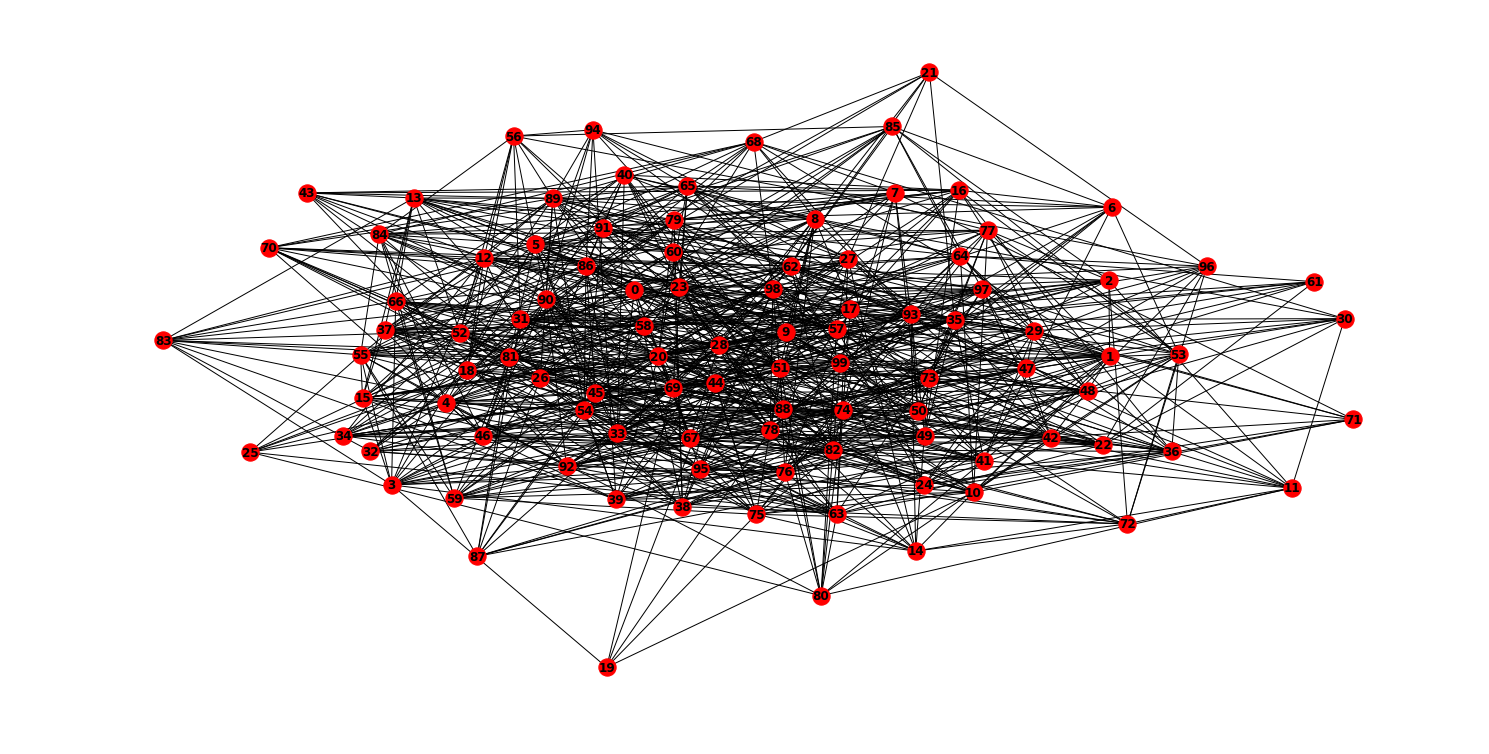

In [380]:
nx.draw(G, with_labels=True, font_weight='bold')